<a href="https://colab.research.google.com/github/jamesmattluyon/CpE-AIML/blob/main/58034_LabNo_06_BrenanAndFriends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 05.2: Perceptrons, Gradient Descent, and Backpropagation
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$



## Laboratory Activity
1. For the laboratory activity, obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.

2. Identify an algorithm or method in performing a single or multiple variable classification using the Perceptron alogrithm. 

3. You must re-create your Perceptron algorithm with Gradient Descent and Backpropagation using your own code in a separate Google Colab. However, you are required to observe the following:

>* Enforce object-oriented programming by implementing at least two of the pillars of OOP in the entirety of the solution.
* Dedicated functions for training, predicting, and evaluating the solution.
* A DataFrame of the metrics of the solution
* A visualization of the solution’s results.


#Part 1

> The chosen dataset is "Diabestes.csv", the National Institute of Diabetes and Digestive and Kidney Diseases provided this data. It is available on Kaggle and is given by the Pima Indians Diabetes Database. Diabetes is a condition that affects people all over the world. When a patient has diabetes, it is usually in sleep mode. Diabetes enhances the patient's immune system. It's a common cause of heart problems. In this lab activity, the students use a perceptron to classifies to linear data and predicting the accuracy of diabetes.




Dataset: https://www.kaggle.com/saurabh00007/diabetescsv

#Part 2

### XGBoost Algorithm

> The  XGBoost Model library in python is a free. We will use XGBoost Model algorithm to achieve the highest level of accuracy The metric of 'accuracy' is used to evaluate models. The number of accurately predicted instances in a dataset divided by the total number of occurrences in the dataset is the ratio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('/content/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


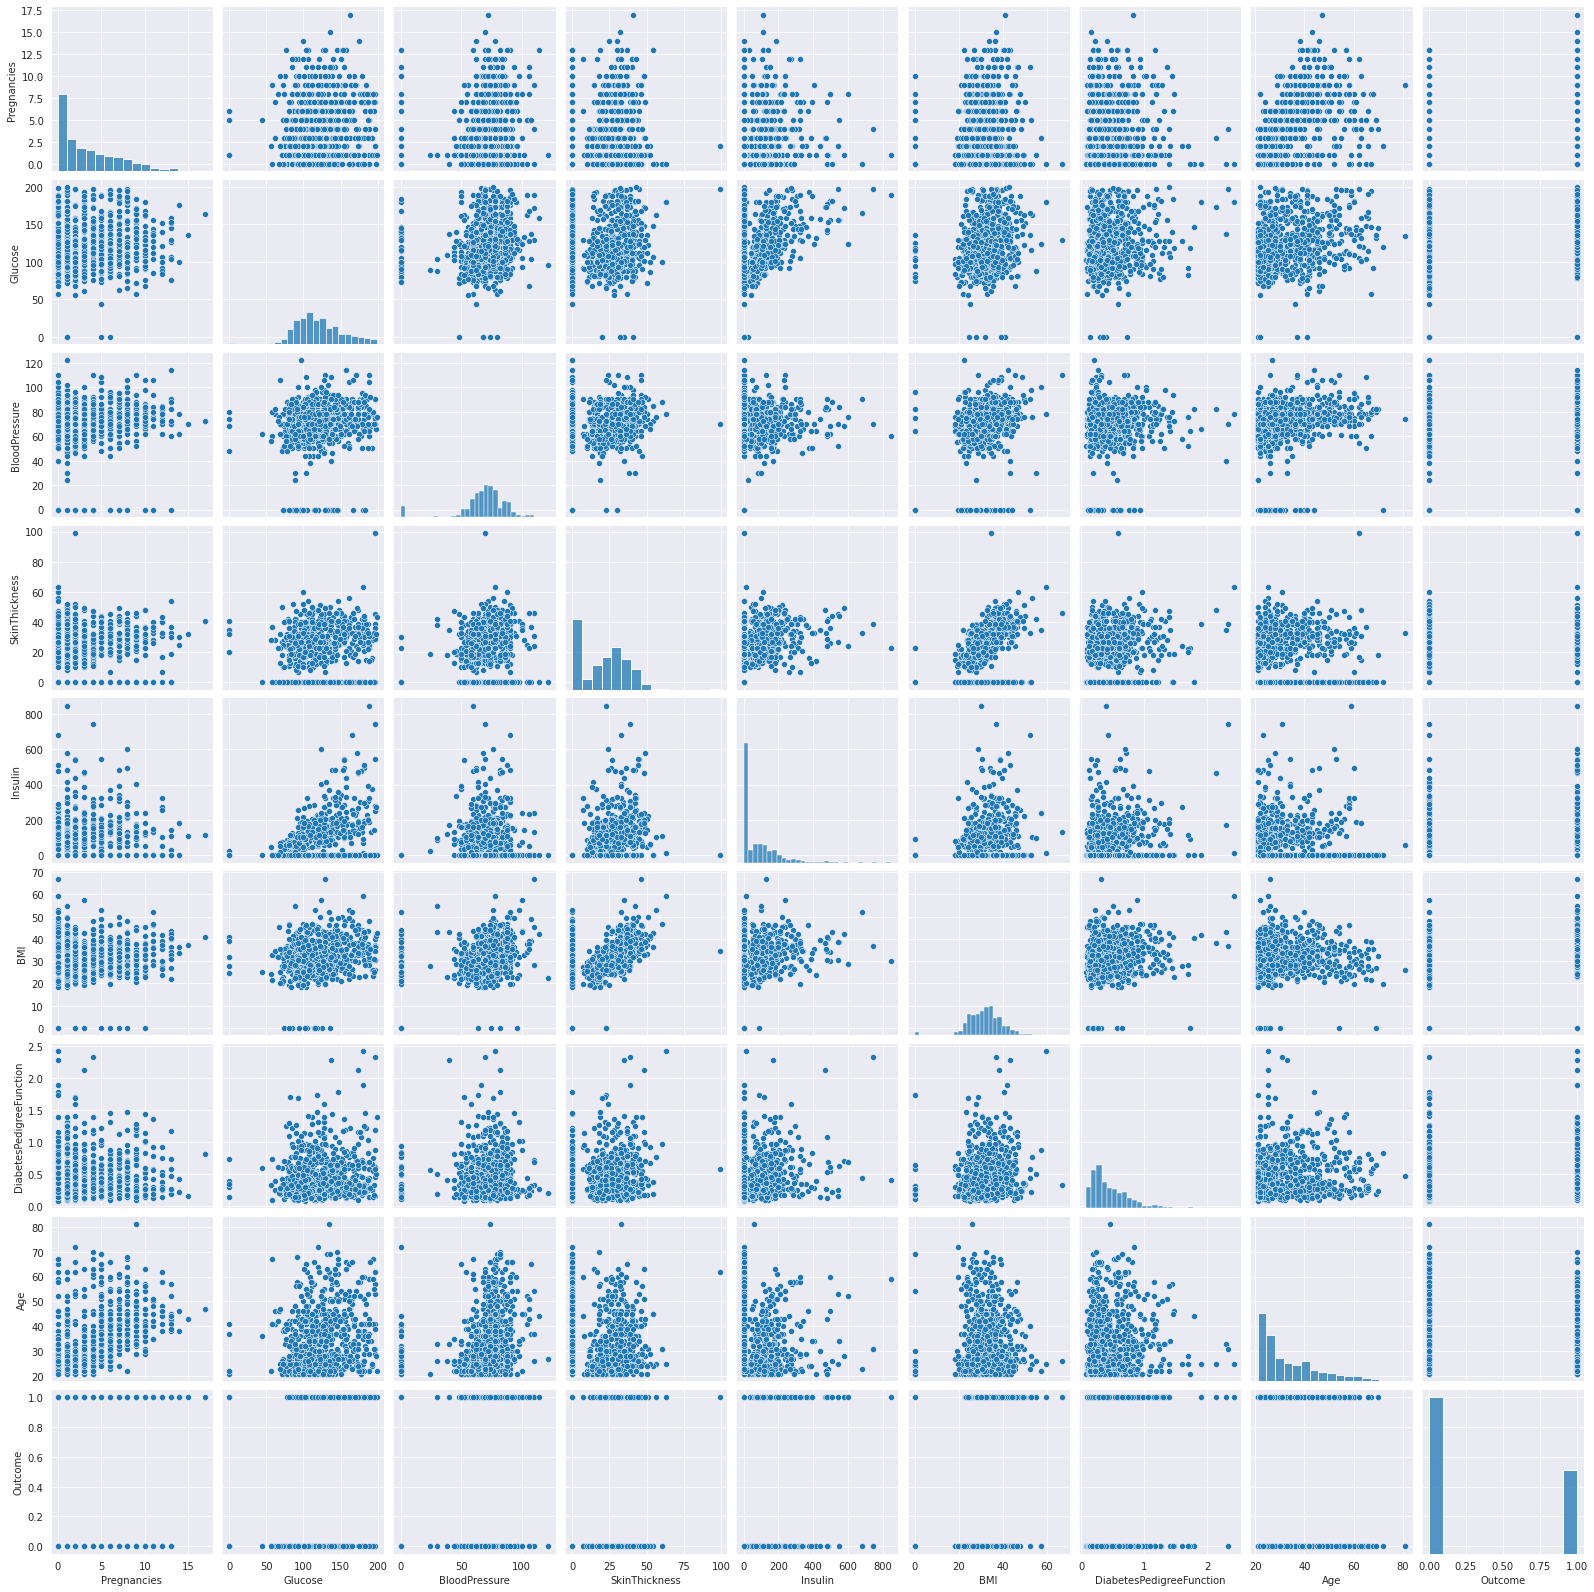

In [3]:
sns.pairplot(data)

In [4]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


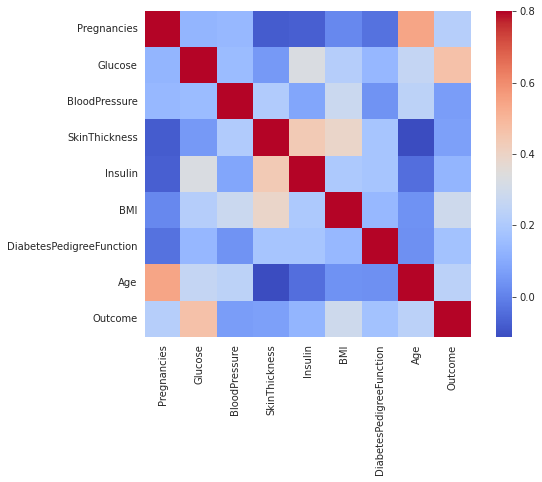

In [5]:
matrix = data.corr()
ax = plt.subplots(figsize=(9,6)), sns.heatmap(matrix, vmax=.8, square=True, cmap="coolwarm")

In [6]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
print("Total number of rows: {}",format(len(data)))
print("Number of rows missing Pregnancies: {}",format(len(data.loc[data['Pregnancies']==0])))
print("Number of rows missing Glucose: {}",format(len(data.loc[data['Glucose']==0])))
print("Number of rows missing BloodPressure: {}",format(len (data. oc[data[ 'BloodPressure' ]==0])))
print("Number of rows missing SkinThickness: {}",format(len(data.loc[data[ 'SkinThickness' ]==0])))
print("Number of rows missing Insulin: {}",format(len(data.loc[data['Insulin']==0])))
print("Number of rows missing BMI: {}",format(len(data.loc[data['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {}",format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("Number of rows missing Age: {0}",format(len(data.loc[data['Age']==0])))

Total number of rows: {} 768
Number of rows missing Pregnancies: {} 111
Number of rows missing Glucose: {} 5
Number of rows missing BloodPressure: {} 35
Number of rows missing SkinThickness: {} 227
Number of rows missing Insulin: {} 374
Number of rows missing BMI: {} 11
Number of rows missing DiabetesPedigreeFunction: {} 0
Number of rows missing Age: {0} 0


In [9]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [10]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [11]:
xgb_pred = xgb_model.predict(X_test)

In [12]:
from sklearn import metrics
print ("Accuracy Score =",format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7575757575757576


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, xgb_pred) )
print(classification_report(y_test, xgb_pred) )

[[122  28]
 [ 28  53]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       150
           1       0.65      0.65      0.65        81

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



>XGBoost algorithm is the best model for this lab activity, with an Accuracy Score of 0.75. (75 percent ). There are a variety of methods for determining the optimal model that you can investigate and apply to your models. I chose the accuracy score as the major criterion in determining the best model for this basic introduction to machine learning.

In [14]:
xgb_model.feature_importances_

array([0.10000063, 0.2717849 , 0.0589232 , 0.09271461, 0.09506187,
       0.1545468 , 0.08372742, 0.14324053], dtype=float32)

In [15]:
print("Prediction Possibilities")
xgb_model.predict_proba(X_test)

Prediction Possibilities


array([[0.33670032, 0.6632997 ],
       [0.17994237, 0.82005763],
       [0.9595665 , 0.04043354],
       [0.63366497, 0.36633503],
       [0.9981339 , 0.00186608],
       [0.07065821, 0.9293418 ],
       [0.10571831, 0.8942817 ],
       [0.9424837 , 0.0575163 ],
       [0.60124075, 0.39875922],
       [0.9346363 , 0.06536369],
       [0.99504   , 0.00496002],
       [0.92735016, 0.07264981],
       [0.795766  , 0.20423399],
       [0.69783086, 0.30216914],
       [0.8471262 , 0.15287381],
       [0.16748196, 0.83251804],
       [0.15677679, 0.8432232 ],
       [0.97282237, 0.02717765],
       [0.4384632 , 0.5615368 ],
       [0.9809533 , 0.01904674],
       [0.6779882 , 0.3220118 ],
       [0.7076849 , 0.29231513],
       [0.1918922 , 0.8081078 ],
       [0.8115972 , 0.18840274],
       [0.860094  , 0.13990597],
       [0.16496724, 0.83503276],
       [0.9521208 , 0.04787924],
       [0.5396495 , 0.46035048],
       [0.99649477, 0.00350523],
       [0.21565056, 0.78434944],
       [0.

> The patient with index 0 has a 33.1 percent likelihood of not having diabetes, while the patient with index 1 has a 82 percent chance of having diabetes.

#Part 3

### *Solution*

In [16]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import hard_sigmoid
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [17]:
class Perceptron_():

  def fit(self, X, y):
    self.model_ = Perceptron(random_state=1).fit(X, y)
    return self.model_

  def score(self, X, y):
    return self.model_.score(X,y)
  
  def train(self, X, y):
    self.model = Sequential()
    self.model.add(Dense(1, input_shape=(8,), activation=hard_sigmoid, kernel_initializer='glorot_uniform'))
    self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    self.model.fit(X, y, epochs=200, batch_size=25, verbose=1, validation_split=0.2)
    train_ = self.model.evaluate(X, y)
    return train_
  
  def accuracy(self, X_train, y_train):
    self.model = Sequential()
    self.model.add(Dense(32, activation = 'relu', input_dim = 8))
    self.model.add(Dense(16, activation = 'relu'))
    self.model.add(Dense(1, activation = 'sigmoid'))
    self.model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    self.model.fit(X_train, y_train, epochs = 200, verbose = False)
    self.scores = self.model.evaluate(X_train, y_train, verbose = False)
    sc1 = print("Training Accuracy: %.2f%%\n" % (self.scores[1] * 100))
    self.scores = self.model.evaluate(X_test, y_test, verbose = False)
    sc2 = print("Testing Accuracy: %.2f%%\n" % (self.scores[1] * 100))
    return sc1, sc2
  
  def intercepts(self, X):
    return self.model_.intercept_

  def coefficients(self, x):
    return self.model_.coef_
  
  def predict(self, x):
    self.predictions = self.model.predict(X_test)
    FPR, TPR, _ = roc_curve(y_test, self.predictions)
    return  FPR, TPR

  def evaluate(self, X, y):
    self.model_.fit(X,y)
    preds = self.model_.predict(X)
    dataframe = {'Metrics Value': {
          'Accuracy': metrics.accuracy_score(y, preds),
          'Precision': metrics.precision_score(y, preds),
          'Recall': metrics.recall_score(y,preds),
          'F1-Score': metrics.f1_score(y, preds),
          'L2 Error': np.sqrt(np.sum(np.square(y - preds)))
      }  
    }
    df = pd.DataFrame(dataframe)
    return df
  
  def visualize(self, X, y):
    y_test_pred = np.argmax(self.model.predict(X_test), axis=-1)
    c_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6.11,5))
    ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
    ax.set_xlabel("Prediction")
    ax.set_ylabel("Actual")
    plt.show() 
    plt.clf()

    y_test_pred_probs = self.model.predict(X_test)
    FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
    plt.plot(FPR, TPR)
    plt.plot([0,1],[0,1],'--', color='black') #diagonal line
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.clf()
    
  



In [18]:
dfv = pd.read_csv('/content/diabetes.csv').values
X = dfv[:, 0:8]
y = dfv[:, 8]

In [19]:
df = pd.read_csv('diabetes.csv')
df.head()
X1 = df.loc[:, df.columns != 'Outcome']
y1 = df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2)

In [20]:
ptrons =  Perceptron_()

In [21]:
ptrons.fit(X,y)

Perceptron(random_state=1)

In [22]:
ptrons.score(X,y)

0.53125

In [23]:
ptrons.train(X,y)

Epoch 1/200
25/25 [==============================] - 1s 11ms/step - loss: 6.9041 - accuracy: 0.5407 - val_loss: 7.7776 - val_accuracy: 0.4805
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 6.6664 - accuracy: 0.5537 - val_loss: 7.8640 - val_accuracy: 0.4870
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 6.3540 - accuracy: 0.5733 - val_loss: 7.8682 - val_accuracy: 0.4805
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 6.3983 - accuracy: 0.5684 - val_loss: 7.8626 - val_accuracy: 0.4870
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 6.4477 - accuracy: 0.5651 - val_loss: 7.8624 - val_accuracy: 0.4870
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 6.4468 - accuracy: 0.5651 - val_loss: 7.8626 - val_accuracy: 0.4870
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 6.4456 - accuracy: 0.5651 - val_loss: 7.8627 - val_accuracy: 0.4870
Epoch 8/200


[6.114949703216553, 0.5794270634651184]

In [24]:
ptrons.accuracy(X_train, y_train)

Training Accuracy: 80.13%

Testing Accuracy: 77.27%



(None, None)

In [25]:
ptrons.intercepts(X_train) ## X_test, y_train, X, y = - 289.

array([-289.])

In [26]:
ptrons.coefficients(X_train) ## X_test, y_train, X, y = value of the array

array([[ 979.   ,  116.   , -247.   ,  156.   ,   67.   ,  -98.8  ,
          58.505,   24.   ]])

In [27]:
ptrons.predict(X_train)

(array([0.        , 0.        , 0.        , 0.00925926, 0.00925926,
        0.02777778, 0.02777778, 0.0462963 , 0.0462963 , 0.05555556,
        0.05555556, 0.06481481, 0.06481481, 0.07407407, 0.07407407,
        0.09259259, 0.09259259, 0.10185185, 0.10185185, 0.11111111,
        0.11111111, 0.12037037, 0.12037037, 0.15740741, 0.15740741,
        0.2037037 , 0.2037037 , 0.30555556, 0.30555556, 0.36111111,
        0.36111111, 0.39814815, 0.39814815, 0.44444444, 0.44444444,
        0.47222222, 0.47222222, 0.48148148, 0.48148148, 0.5       ,
        0.5       , 0.65740741, 0.65740741, 0.67592593, 0.67592593,
        0.87962963, 0.87962963, 0.89814815, 0.89814815, 0.94444444,
        0.94444444, 1.        , 1.        ]),
 array([0.        , 0.02173913, 0.06521739, 0.06521739, 0.13043478,
        0.13043478, 0.15217391, 0.15217391, 0.17391304, 0.17391304,
        0.2173913 , 0.2173913 , 0.26086957, 0.26086957, 0.30434783,
        0.30434783, 0.41304348, 0.41304348, 0.43478261, 0.43478261,
  

In [28]:
ptrons.evaluate(X,y)

,Metrics Value
Accuracy,0.531250
F1-Score,0.544304
L2 Error,18.973666
Precision,0.411877
Recall,0.802239


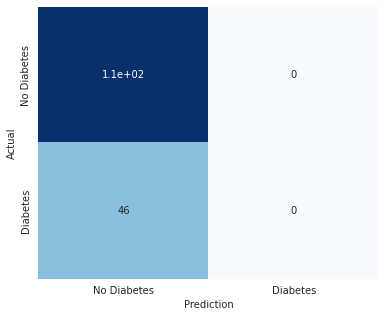

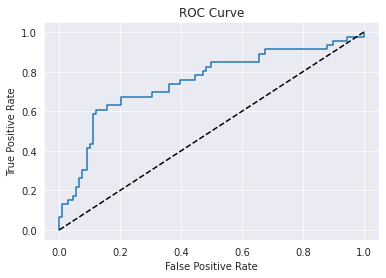

<Figure size 432x288 with 0 Axes>

In [29]:
ptrons.visualize(X_test, y_test)

>Upon seeing the results of the graph in the ROC curve whereas it is mostly used for medicine related machine learning. Presented above the ROC graph is the True Positive Rate plotted against the false positive rate which is used to create an ROC curve. Observing the ROC graph the test becomes less accurate when the curve approaches the ROC space's 45-degree diagonal.